# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

In [6]:
#set style sns to whitegrid
sns.set_style('whitegrid')

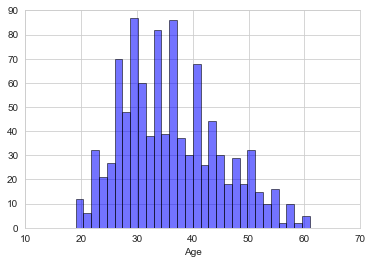

In [7]:
sns.distplot(ad_data['Age'], kde=False, bins=30, hist_kws={'color':'blue', 'edgecolor':'black', 'alpha':0.55})
plt.xlim(10,70)
plt.ylim(0,90)
plt.show()

**Create a jointplot showing Area Income versus Age.**

In [8]:
from scipy.stats import pearsonr

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


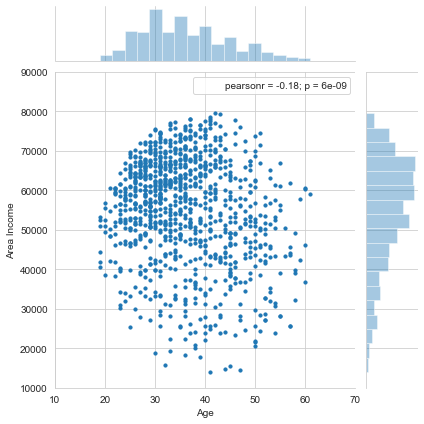

In [9]:
_ = sns.jointplot(x='Age',y='Area Income', data=ad_data, xlim=(10,70), ylim=(10000,90000), stat_func=pearsonr, joint_kws={'s':10})

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

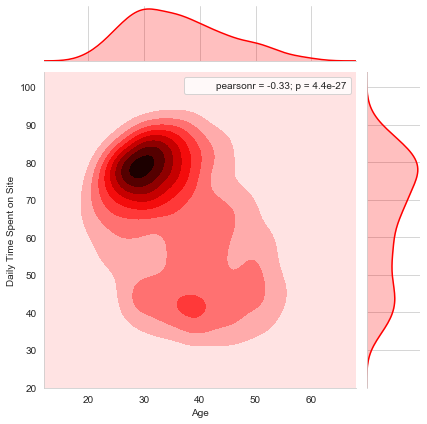

In [10]:
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', stat_func=pearsonr, kind='kde', color='red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

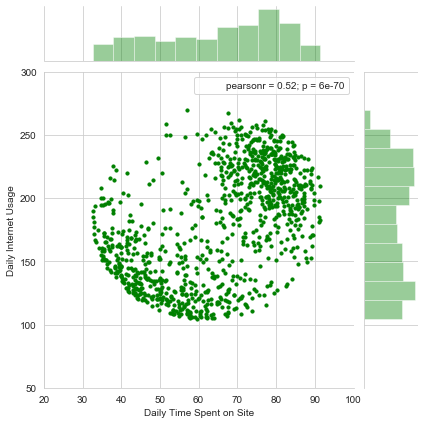

In [11]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, stat_func=pearsonr, color='green',
             joint_kws={'s':10}, xlim=(20,100), ylim=(50,300))

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

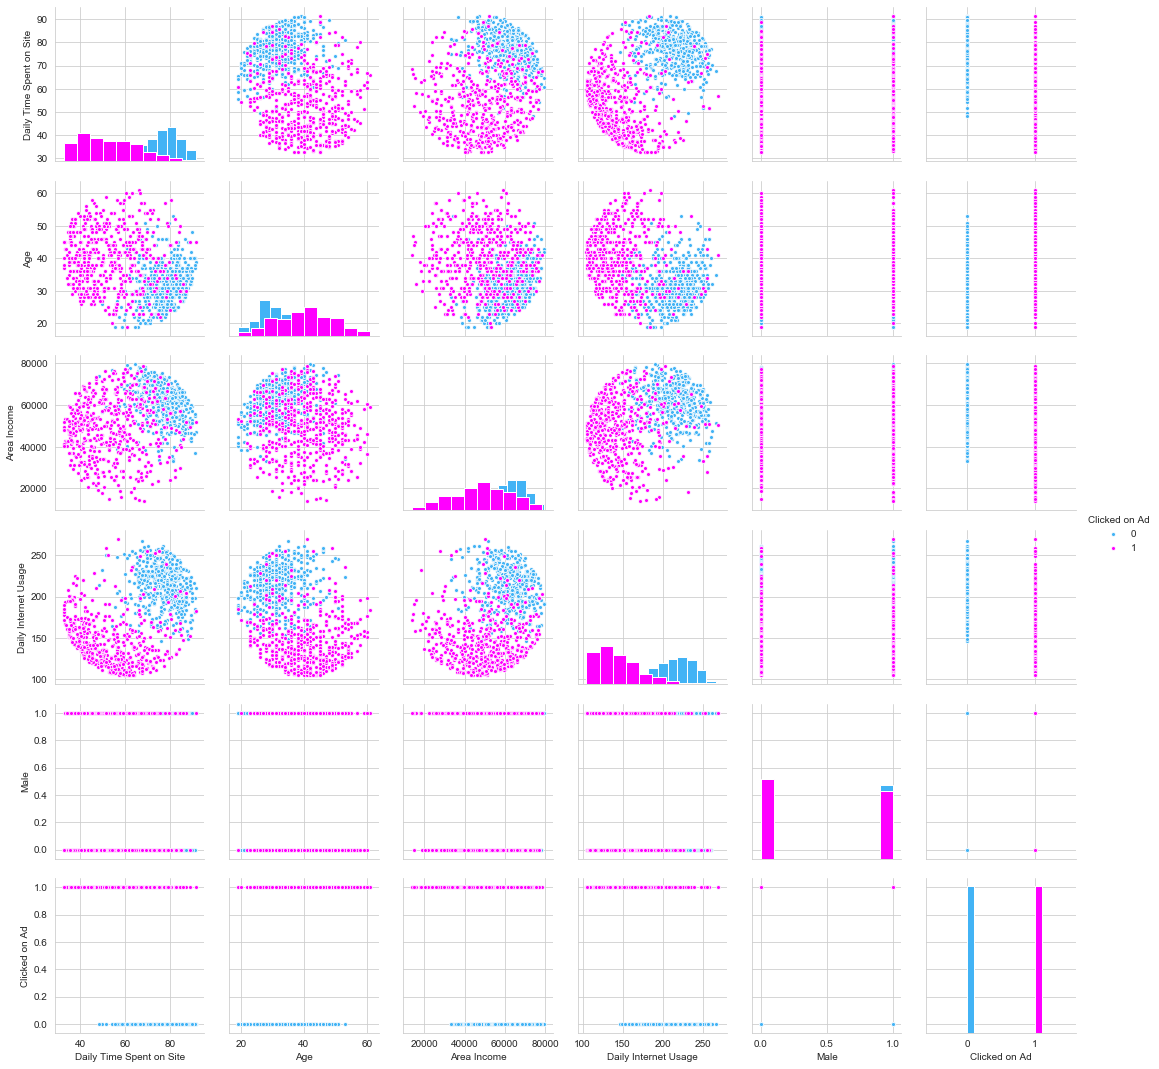

In [12]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', diag_kind='hist', palette={1:'magenta', 0:'#42b3f5'}, plot_kws={'s':15})

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [13]:
ad_data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [14]:
ad_data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [15]:
ad_data['Month'] = ad_data['Timestamp'].apply(lambda ser: int(ser.split('-')[1]))

In [16]:
ad_data.groupby('Month').sum()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Month,,,,,,
1,9584.37,5292,8283752.53,27075.96,66,69
2,10525.79,5626,8842641.06,28108.02,73,83
3,10050.89,5626,8563723.22,27696.97,88,74
4,9651.85,5447,8082911.97,26577.32,69,74
5,9414.66,5189,8141431.01,26295.04,67,79
6,9105.29,5111,7659559.53,25353.02,72,71
7,6667.35,3718,5425980.76,18893.77,46,50


** Split the data into training set and testing set using train_test_split**

In [17]:
X = ad_data.drop(['Timestamp', 'City', 'Country', 'Ad Topic Line', 'Clicked on Ad'], axis=1)
y = ad_data['Clicked on Ad']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

** Train and fit a logistic regression model on the training set.**

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [22]:
y_pred = model_1.predict(X_test)

** Create a classification report for the model.**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       156
           1       0.88      0.85      0.87       144

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



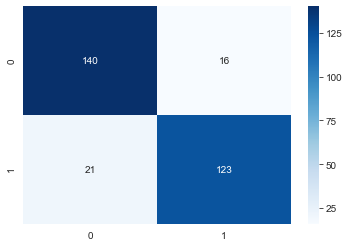

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.10g')

In [32]:
model_1.coef_

array([[-7.29348138e-02,  2.96192565e-01, -1.90119067e-05,
        -2.53818503e-02,  1.96084531e-03,  2.28732006e-02]])

In [34]:
pd.DataFrame({'coef':model_1.coef_[0], 'columns':X.columns})

,coef,columns
0,-0.072935,Daily Time Spent on Site
1,0.296193,Age
2,-0.000019,Area Income
3,-0.025382,Daily Internet Usage
4,0.001961,Male
5,0.022873,Month


## Great Job!